# The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Business Context and The Problem](#introduction)
* [Data](#data)
* [Methodology](#method)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Business Context and The Problem <a name="introduction"></a>

San Jose is a large city surrounded by rolling hills and the largest city in Northern California. It is a multicultural and very diverse due to a large population of migrants from various parts of world. This has resulted in the establishment of various authentic ethnic restaurants in the city, ranging from Indian, Korean, Mexican, and Chinese, to Ethiopian.

In this project we will try to find an optimal neighborhood to open a restaurant in San Jose. Specifically, this report will be targeted to stakeholders interested in opening an **Indian restaurant** in San Jose, CA. Since there are lots of restaurants in San Jose, we will try to find **locations with less Indian cuisines.** We are also particularly interested in **neighborhoods known for restaurants but not with many Indian cuisines in vicinity.** We would also check the selected neighborhoods for any related Indian activities like Indian grocery shops, temples etc which probably help the Indian cuisine to do more business.

## Data <a name="data"></a>

The following data sources will be used in this project to do the relevant analysis:

1.	Neighborhoods in San Jose Wikipedia: https://en.wikipedia.org/wiki/Category:Neighborhoods_in_San_Jose,_California
2.	Geocoder – Geocoder library and Nominatim API to determine the latitude and longitude for each of the neighborhoods 
3.	Location Data - Foursquare API will be leveraged to get the list of current restaurants and other most popular venues for each of those neighborhoods


### Neighborhood Data

Fortunately, all the neighborhoods are listed in the Wikipedia and we will directly take this list into python and create a dataframe for these neighborhoods.

Neighborhoods in San Jose, CA:

The Alameda	
East San Jose	
San Pedro Square
Almaden Valley	
Edenvale	
Santa Teresa
Alum Rock	
Evergreen	
Santana Row
Alviso	
Japantown	
Seven Trees
Berryessa	
King and Story	
College Park
Blossom Valley	
Little Portugal	
Shasta Hanchett Park
Buena Vista	Luna Park	
Silver Creek Valley
Burbank	Meadowfair	
SoFA District
Cambrian Park	
Midtown San Jose	
South San Jose
Chinatown	
Naglee Park	
Spartan Keyes
Communications Hill	
North San Jose	
St. Leo
Coyote Valley	
North San Jose 
Innovation District	
West San Carlos
Downtown San Jose	
Palm Haven	
West San Jose
East Foothills	
Rose Garden	
Willow Glen


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library



### Take all Neighborhoods into a list and then create a dataframe

In [9]:
sj_n=['The Alameda',
'Almaden Valley',
'Alum Rock',
'Alviso',
'Berryessa',
'Blossom Valley',
'Buena Vista',
'Burbank',
'Cambrian Park',
'Chinatown',
'Communications Hill',
'Coyote Valley',
'Downtown San Jose',
'East Foothills',
'East San Jose',
'Edenvale',
'Evergreen',
'Japantown',
'King and Story',
'Little Portugal',
'Luna Park',
'Meadowfair',
'Midtown San Jose',
'Naglee Park',
'North San Jose',
'North San Jose Innovation District',
'Palm Haven',
'Rose Garden',
'San Pedro Square',
'Santa Teresa',
'Santana Row',
'Seven Trees',
'College Park',
'Shasta Hanchett Park',
'Silver Creek Valley',
'SoFA District',
'South San Jose',
'Spartan Keyes',
'St. Leo',
'West San Carlos',
'West San Jose',
'Willow Glen'
]

In [14]:
sj_df=pd.DataFrame(sj_n,columns=['Neighbourhood'])

In [15]:
sj_df

,Neighbourhood
0,The Alameda
1,Almaden Valley
2,Alum Rock
3,Alviso
4,Berryessa
5,Blossom Valley
6,Buena Vista
7,Burbank
8,Cambrian Park
9,Chinatown


### Geocoder Data

Geocoder library and Nominatim api will be leveraged to get the Geocoding data for each of the neighborhoods that will be analyzed in this project. Below is the map of neighborhood data after retrieving the latitude and longitudes. 

In [18]:
import geocoder

def get_latlng(pc):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, San Jose, California'.format(pc))
        lat_lng_coords = g.latlng
    return lat_lng_coords
    
get_latlng('St. Leo')

[37.32883000000004, -121.90833999999995]

In [19]:
pc = sj_df['Neighbourhood']    
lat_lng = [ get_latlng(i) for i in pc.tolist() ]

In [20]:
df_latlng = pd.DataFrame(lat_lng, columns=['Latitude', 'Longitude'])
sj_df['Latitude'] = df_latlng['Latitude']
sj_df['Longitude'] = df_latlng['Longitude']
sj_df

,Neighbourhood,Latitude,Longitude
0,The Alameda,37.336526,-121.917998
1,Almaden Valley,37.231117,-121.894039
2,Alum Rock,37.378835,-121.819182
3,Alviso,37.425400,-121.973220
4,Berryessa,37.386340,-121.860750
5,Blossom Valley,37.239164,-121.937546
6,Buena Vista,37.319650,-121.918550
7,Burbank,37.325300,-121.929370
8,Cambrian Park,37.275156,-121.940299
9,Chinatown,38.213810,-119.014030


In [29]:
address = 'San Jose, CA'

geolocator = Nominatim(user_agent="SJ_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of San Jose, CA are 37.3361905, -121.8905833.


In [30]:
import folium

# create map of Toronto using latitude and longitude values
map_sj = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng,  neighborhood in zip(sj_df['Latitude'], sj_df['Longitude'], sj_df['Neighbourhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sj)  
    
map_sj

### Location Data

A list of all restaurants and top venues along with their categories for each of these neighborhoods will be retrieved through the Foursquare API https://api.foursquare.com. For e.g, below is the restaurant data retrieved from Foursquare API:


In [ ]:

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        #print (url)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [76]:
CLIENT_ID = 'UNKUKOOPPFSOM5JGA55QG3JNAGP55NTWA5YWG0GY104JOUIM' # your Foursquare ID
CLIENT_SECRET = '0L4LAQHISCIFGMHY3IVU2IQJIPBON5N35NU3I2MREDT4RVBL' # your Foursquare Secret
VERSION = '20180606'
LIMIT = 30


In [77]:
sj_venues = getNearbyVenues(names=sj_df['Neighbourhood'],
                                   latitudes=sj_df['Latitude'],
                                   longitudes=sj_df['Longitude']
                                  )

The Alameda
Almaden Valley
Alum Rock
Alviso
Berryessa
Blossom Valley
Buena Vista
Burbank
Cambrian Park
Chinatown
Communications Hill
Coyote Valley
Downtown San Jose
East Foothills
East San Jose
Edenvale
Evergreen
Japantown
King and Story
Little Portugal
Luna Park
Meadowfair
Midtown San Jose
Naglee Park
North San Jose
North San Jose Innovation District
Palm Haven
Rose Garden
San Pedro Square
Santa Teresa
Santana Row
Seven Trees
College Park
Shasta Hanchett Park
Silver Creek Valley
SoFA District
South San Jose
Spartan Keyes
St. Leo
West San Carlos
West San Jose
Willow Glen


Looking good. So now we have all the venues in each neighborhood and we know which categories they belong! 

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal location for a new Indian restaurant!

## Methodology <a name="method"></a>

1. Perform Data Wrangling to cleanup and reformat the data
2. Retrieve Retaurant and related categories from Venue category
3. See the distribution of Restaurants by Cuisine type
4. Identify neighborhoods with Indian restaurants
5. Find neighborhoods known for Restaurants
6. Pick a neighborhood that has the least ratio of Indian restaurants to overall restaurants

Recommend a best neighborhood to the Stakeholder for opening their new Indian restaurant


In [83]:
sj_venues['Venue Category'].unique

<bound method Series.unique of 0                                 Gym
1                  Mexican Restaurant
2                  Mexican Restaurant
3                            Wine Bar
4                      Sandwich Place
5             New American Restaurant
6                       Grocery Store
7                              Museum
8                              Garden
9                         Coffee Shop
10               Gym / Fitness Center
11                             Bakery
12                    Thai Restaurant
13                 Frozen Yogurt Shop
14                        Pizza Place
15                        Pizza Place
16                         Smoke Shop
17                 Chinese Restaurant
18                          Pet Store
19                        Coffee Shop
20                Sporting Goods Shop
21                         Taco Place
22                             Buffet
23                     Shipping Store
24                     Used Bookstore
25                 

After examining the list, we can see filter the category that contains words like Retaurant, Pizza, food and Burger 

In [93]:
sj_food=sj_venues[sj_venues['Venue Category'].str.contains('Restaurant|Pizza|food|Burger')]
sj_food.reset_index(inplace=True,drop=True)

### Lets plot total # of restaturants for each cuisine type:

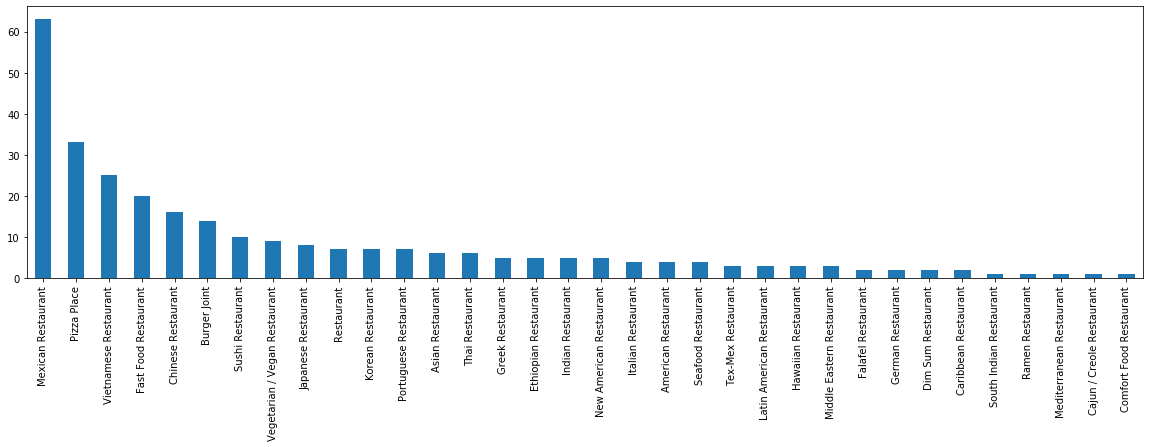

In [106]:
sj_food['Venue Category'].value_counts().plot(kind='bar',figsize=(20,5))


In [107]:
sj_food['Venue Category'].value_counts()

Mexican Restaurant               63
Pizza Place                      33
Vietnamese Restaurant            25
Fast Food Restaurant             20
Chinese Restaurant               16
Burger Joint                     14
Sushi Restaurant                 10
Vegetarian / Vegan Restaurant     9
Japanese Restaurant               8
Restaurant                        7
Korean Restaurant                 7
Portuguese Restaurant             7
Asian Restaurant                  6
Thai Restaurant                   6
Greek Restaurant                  5
Ethiopian Restaurant              5
Indian Restaurant                 5
New American Restaurant           5
Italian Restaurant                4
American Restaurant               4
Seafood Restaurant                4
Tex-Mex Restaurant                3
Latin American Restaurant         3
Hawaiian Restaurant               3
Middle Eastern Restaurant         3
Falafel Restaurant                2
German Restaurant                 2
Dim Sum Restaurant          

### Now Let's see which neighborhoods have Indian Restaurant:

In [108]:
sj_food[sj_food['Venue Category']=='Indian Restaurant']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
48,Cambrian Park,37.275156,-121.940299,Royal Taj,37.269457,-121.944910,Indian Restaurant
88,Evergreen,37.313290,-121.790650,Peacock Indian Cafe,37.313507,-121.793007,Indian Restaurant
105,Japantown,37.348010,-121.896430,Sagar Sweets,37.345903,-121.900682,Indian Restaurant
157,Naglee Park,37.337120,-121.873120,Punjab Cafe,37.339317,-121.883750,Indian Restaurant
186,Palm Haven,37.315552,-121.898154,New Indian Cuisine,37.310389,-121.897145,Indian Restaurant


### Find which neighborhoods have more # of Restaturants:

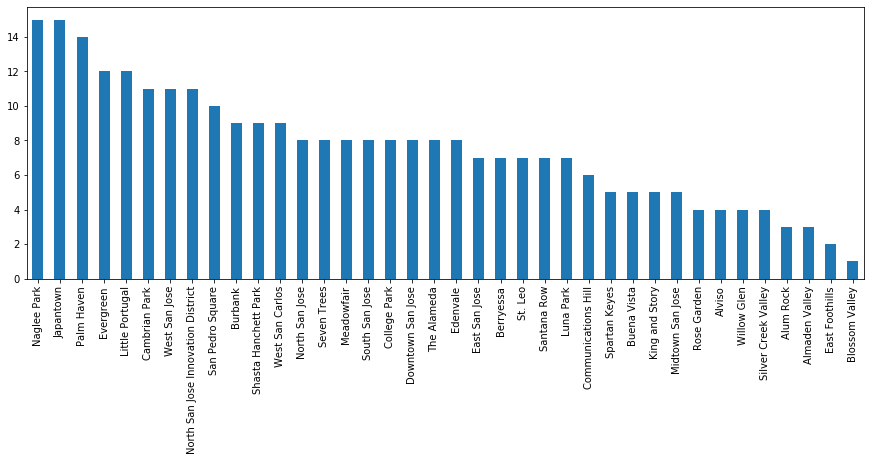

In [110]:
sj_food.Neighborhood.value_counts().plot(kind='bar',figsize=(15,5))

In [111]:
sj_food.Neighborhood.value_counts()

Naglee Park                           15
Japantown                             15
Palm Haven                            14
Evergreen                             12
Little Portugal                       12
Cambrian Park                         11
West San Jose                         11
North San Jose Innovation District    11
San Pedro Square                      10
Burbank                                9
Shasta Hanchett Park                   9
West San Carlos                        9
North San Jose                         8
Seven Trees                            8
Meadowfair                             8
South San Jose                         8
College Park                           8
Downtown San Jose                      8
The Alameda                            8
Edenvale                               8
East San Jose                          7
Berryessa                              7
St. Leo                                7
Santana Row                            7
Luna Park       

In [118]:
import folium

# create map of Toronto using latitude and longitude values
map_sj_food = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(sj_food['Venue Latitude'], sj_food['Venue Longitude'], sj_food['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sj_food)  
    
map_sj_food

In [113]:
sj_food

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Alameda,37.336526,-121.917998,Luna Mexican Restaurant,37.333935,-121.915180,Mexican Restaurant
1,The Alameda,37.336526,-121.917998,Zona Rosa,37.333079,-121.914073,Mexican Restaurant
2,The Alameda,37.336526,-121.917998,Park Station Hashery,37.333942,-121.924574,New American Restaurant
3,The Alameda,37.336526,-121.917998,Tee Nee Thai,37.333136,-121.914159,Thai Restaurant
4,The Alameda,37.336526,-121.917998,Rosie's New York Pizza,37.332047,-121.912800,Pizza Place
5,The Alameda,37.336526,-121.917998,Blaze Pizza,37.341754,-121.911114,Pizza Place
6,The Alameda,37.336526,-121.917998,China Inn,37.332968,-121.913795,Chinese Restaurant
7,The Alameda,37.336526,-121.917998,Chipotle Mexican Grill,37.331907,-121.908660,Mexican Restaurant
8,Almaden Valley,37.231117,-121.894039,Amato Pizza,37.229733,-121.884869,Pizza Place
9,Almaden Valley,37.231117,-121.894039,Thai Love You,37.230366,-121.884910,Thai Restaurant


## Results and Discussion <a name="results"></a>

Our analysis shows that there are great number of restaurants in San Jose. There are pockets of low restaurant density as well. Highest concentration of restaurants was detected on 3 neighborhoods: 1) Naglee Park 2) Japantown 3) Palm Haven, so we focused our attention to these areas initially. Surprisingly, there aren't many Indian restaurants in these neighborhoods. 

Those location candidates can be explored further. It is entirely possible that there is a very good reason for small number of Indian restaurants in any of those areas, reasons which would make them unsuitable for a new restaurant regardless of lack of competition in the area. Recommended zones should therefore be considered only as a starting point for more detailed analysis which could eventually result in location which has not only no nearby competition but also other factors taken into account and all other relevant conditions met.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify San Jose neighborhoods with low ratio of Indian restaurants in order to aid stakeholders in narrowing down the search for optimal neighborhood for an Indian restaurant. By calculating #restaurants distribution from Foursquare data we have identified 3 neighborhoods that justify further analysis and can be used as starting points for final exploration by stakeholders.

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood including parking etc.